<a href="https://colab.research.google.com/github/reguelpangrib29/prak-ml-2217051084-a/blob/main/2217051084_REGUEL_ANDREAS_AGUSTINUS_PANGARIBUAN_A_PERTEMUAN_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

# Package Install

In [60]:
!pip install pillow

# Library

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
%matplotlib inline
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dataset

In [62]:
df = pd.DataFrame(
    {"Y" : pd.Series([1250, 1380, 1425, 1425, 1450, 1300, 1400, 1510, 1575, 1650]),
     "X" : pd.Series([41, 54, 63, 54, 48, 46, 62, 61, 64, 71])
    }
)
df

,Y,X
0,1250,41
1,1380,54
2,1425,63
3,1425,54
4,1450,48
5,1300,46
6,1400,62
7,1510,61
8,1575,64
9,1650,71


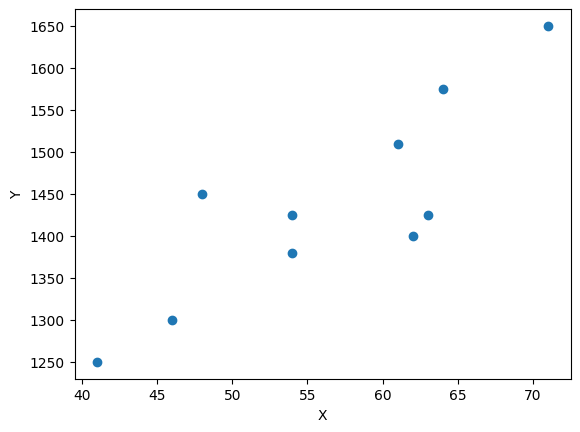

In [63]:
plt.scatter(df['X'], df['Y'])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Preprocessing

In [64]:
# Drop the missing values
df = df.dropna()

In [65]:
# Formatting data
x = np.array(df['X']).reshape((-1,1))
y = np.array(df['Y'])

# Modelling

In [66]:
# Modelling using library function
model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

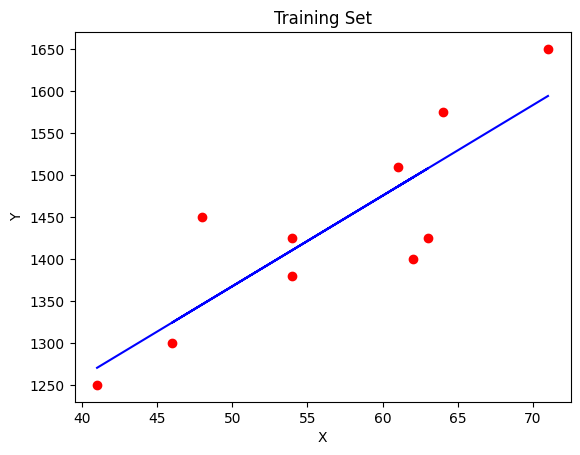

In [67]:
plt.scatter(x,y,color="red")
plt.plot(x,y_pred,color="blue")
plt.title("Training Set")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [68]:
# model.score(x, y)
print("B0: %d" %model.intercept_)
print("B1: %.1f" %model.coef_)

B0: 828
B1: 10.8


<ipython-input-68-b73b62e1e9c9>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("B1: %.1f" %model.coef_)


In [69]:
yp=model.intercept_ + model.coef_ * x

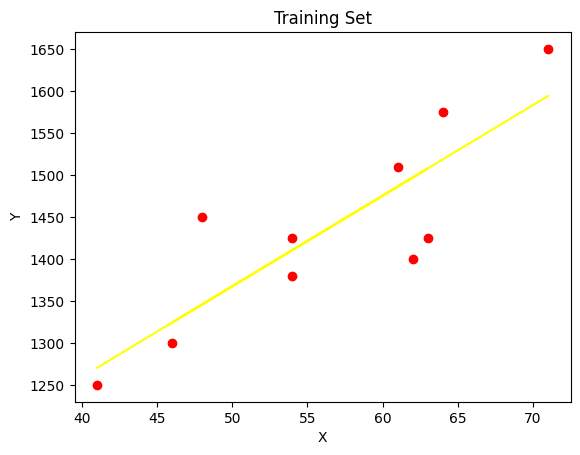

In [70]:
plt.scatter(x,y,color="red")
plt.plot(x,y_pred,color="yellow")
plt.title("Training Set")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

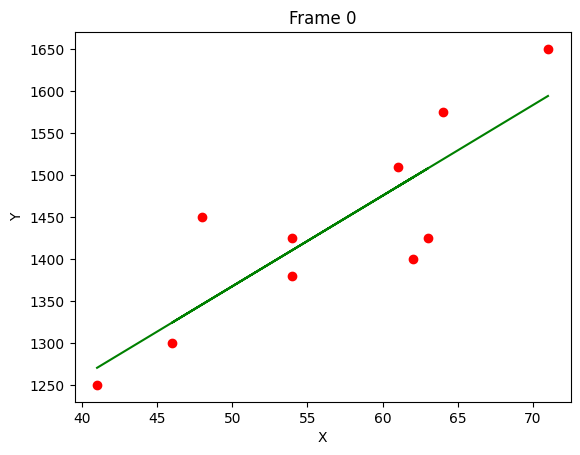

In [71]:
# Initialize figure and axis for animation
fig, ax = plt.subplots()

# Create function to update the plot for each frame
def update(frame):
    ax.clear()
    ax.scatter(x, y, color="red")
    ax.plot(x, yp[:, frame], color="green")
    ax.set_title("Frame {}".format(frame))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

# Create animation
ani = FuncAnimation(fig, update, frames=yp.shape[1], interval=200, blit=False)

# Save the animation as a GIF file
ani.save('linear_regression_animation.gif', writer='pillow')

plt.show()

# Evaluation

In [72]:
# Periksa apakah model bekerja dengan baik atau tidak menggunakan R^2
r_sq = model.score(x,y)
print(f"Coefficient of Determination : {r_sq}")

Coefficient of Determination : 0.7190192591602058
